# Catboost spaceship titanic

In [8]:
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import Pool

### Дать предобработанные данные!

In [4]:
df = pd.read_csv('../train_new.csv')
df

,Transported,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,NumCabin,Side
0,False,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,True,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,False,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,False,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,True,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8471,False,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,98,P
8472,False,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,1499,S
8473,True,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,1500,S
8474,False,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,608,S


In [5]:
target = 'Transported'
features = list(df.columns)
features.remove(target)
X = df[features]
y = df[[target]]

In [6]:
features

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Deck',
 'NumCabin',
 'Side']

### Индексы категориальных переменных

In [7]:
cat_features = [0, 2, 10, 12]
# 1, 4

### Предобработанные тестовые данные

In [33]:
test_df = pd.read_csv('../test_new.csv')
test_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,NumCabin,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,G,1496.0,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,F,442.0,S
4274,9271_01,Mars,True,55 Cancri e,26.0,False,0.0,0.0,0.0,0.0,0.0,D,296.0,P
4275,9273_01,Europa,False,TRAPPIST-1e,26.0,False,0.0,2680.0,0.0,0.0,523.0,D,297.0,P


### Train - весь train, test-test использовать для получения результатов и сабмитов на kaggle

In [218]:
# train_pool = Pool(
#     data = X,
#     label = y,
#     cat_features = cat_features
# )
# 
# test_pool = Pool(
#     data = test_df[features],
#     cat_features = cat_features
# )

### Train - 0.8*train, test - 0.2*train, использовать для подбора параметров и анализа модели

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)

train_pool = Pool(
    data = X_train,
    label = y_train,
    cat_features = cat_features,
)

test_pool = Pool(
    data = X_test,
    label = y_test,
    cat_features = cat_features,
)

### Модель

In [234]:
model = CatBoostClassifier(
                            iterations=700,
                            cat_features=cat_features,
                            loss_function='Logloss',
                            custom_metric=['Accuracy'],
                            early_stopping_rounds=200,
                            l2_leaf_reg=400,
                            depth=6,
                            learning_rate=0.03
                          )

In [235]:
model.fit(train_pool,
          eval_set=test_pool,
          verbose=False,
          plot=True
          )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [236]:
# Замените model и X_test на ваш объект модели и тестовые данные
y_pred_proba = model.predict_proba(X)[:, 1]
y_pred_proba

array([0.80927357, 0.1533983 , 0.10684912, ..., 0.75710547, 0.0589672 ,
       0.95462647])

In [237]:
y

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8471,False
8472,False
8473,True
8474,False


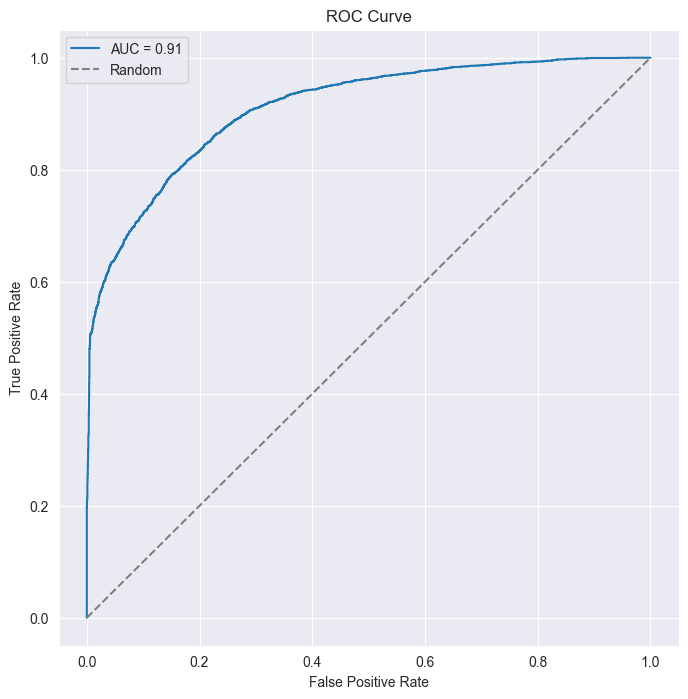

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import pyplot as plt

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Оптимальный порог для максимизации accuracy: 0.55


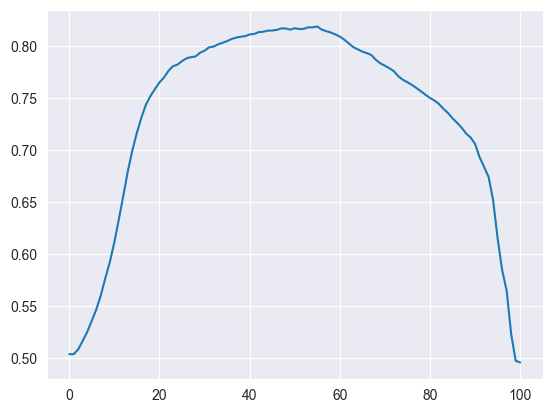

In [239]:
from sklearn.metrics import accuracy_score

# y_true - истинные метки классов
# y_scores - вероятности принадлежности к классу 1 (обычно получаются из predict_proba)

# Различные пороги
thresholds = np.linspace(0, 1, 101)

# Список для хранения accuracy для каждого порога
accuracies = []

y_scores = y_pred_proba
y_true = y

# Вычисление accuracy для каждого порога
for threshold in thresholds:
    y_pred = (y_scores > threshold).astype(int)
    accuracies.append(accuracy_score(y_true, y_pred))

# Найти порог с максимальной accuracy
optimal_threshold = thresholds[np.argmax(accuracies)]
threshold = optimal_threshold
print("Оптимальный порог для максимизации accuracy:", optimal_threshold)

plt.plot(accuracies)

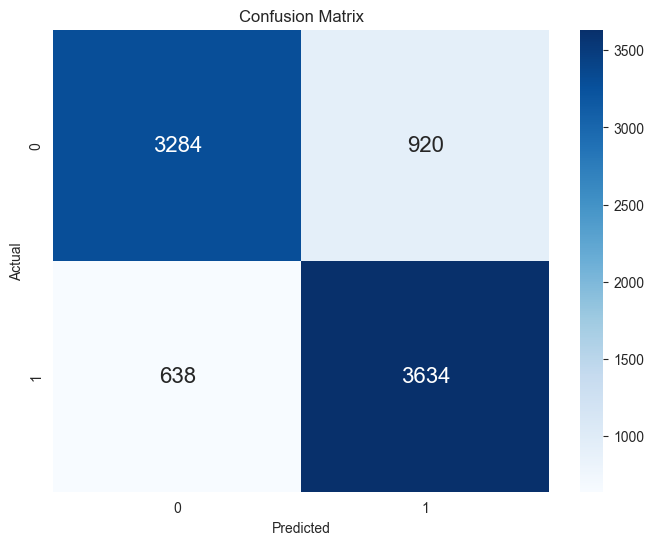

In [247]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Преобразовать вероятности в бинарные предсказания
y_pred = (y_pred_proba > threshold).astype(int)

# Получить таблицу сопряженности
cm = confusion_matrix(y, y_pred)

# Визуализация таблицы сопряженности
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Получение предсказаний для сабмитов

In [248]:
# test_df['Transported'] = model.predict_proba(test_pool)[:, 1] > threshold
# preds = test_df[['PassengerId', 'Transported']]
# preds.to_csv('preds_catboost.csv', index=False)

In [249]:
importance = model.get_feature_importance(data=test_pool,
                                          type='LossFunctionChange')

In [250]:
np.column_stack((features, importance))

array([['HomePlanet', '0.011593460385611654'],
       ['CryoSleep', '0.01511466184455934'],
       ['Destination', '0.0022495819731827293'],
       ['Age', '9.895016434646742e-05'],
       ['VIP', '-9.120647667670845e-06'],
       ['RoomService', '0.036156873416991475'],
       ['FoodCourt', '0.016024529121161868'],
       ['ShoppingMall', '0.00587952511547607'],
       ['Spa', '0.0708016142347419'],
       ['VRDeck', '0.03905379829444988'],
       ['Deck', '0.010623623441603475'],
       ['NumCabin', '0.012193969792030745'],
       ['Side', '0.009151023478907505']], dtype='<U32')

In [260]:
preds = model.predict_proba(X_test)[:, 1] > threshold
preds

array([ True,  True, False, ..., False, False,  True])

In [261]:
import shap
shap_values = model.get_feature_importance(
    test_pool,
    'ShapValues'
)
expected_value = shap_values[0, -1]
shap_values = shap_values[:,:-1]

shap.initjs()

In [262]:
np.column_stack((preds, y_test, X_test))

array([[True, True, 'Earth', ..., 'G', 972, 'S'],
       [True, True, 'Mars', ..., 'E', 352, 'P'],
       [False, True, 'Earth', ..., 'F', 333, 'S'],
       ...,
       [False, False, 'Europa', ..., 'E', 60, 'S'],
       [False, False, 'Europa', ..., 'D', 35, 'S'],
       [True, False, 'Mars', ..., 'D', 155, 'P']], dtype=object)

In [264]:
shap.force_plot(expected_value, shap_values[0, :], X_test[0, :])

In [265]:
shap.force_plot(expected_value, shap_values[2, :], X_test[2, :])

In [266]:
shap.force_plot(expected_value, shap_values[4, :], X_test[4, :])

In [267]:
shap.force_plot(expected_value, shap_values[5, :], X_test[5, :])